**Checkpoint 1: Data Cleaning 1**

In [1]:
#to filter warnings
import warnings
warnings.filterwarnings('ignore')

#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing csv files
companies=pd.read_csv(r'C:\Users\Aravind\Downloads\companies.csv', encoding= 'ANSI')
rounds2=pd.read_csv(r'C:\Users\Aravind\Downloads\rounds2.csv', encoding= 'ANSI')

In [3]:
#Table 1.1
#How many unique companies are present in rounds2?
rounds2.company_permalink=rounds2.company_permalink.str.lower()
rounds2.company_permalink.describe()

count                       114949
unique                       66368
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

In [4]:
#How many unique companies are present in the companies file?
companies.permalink=companies.permalink.str.lower()
companies.permalink.describe()

count                   66368
unique                  66368
top       /organization/xcorp
freq                        1
Name: permalink, dtype: object

In [5]:
#In the companies data frame, which column can be used as the  unique key for each company?
#permalink
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/organization/xcorp,Peach,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [6]:
#Are there any companies in the rounds2 file which are not  present in companies ?
rounds2[rounds2['company_permalink'].isin(companies['permalink'])==False]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


In [7]:
#Merge the two data frames
#Name the merged frame master_frame
master_frame=pd.merge(rounds2,companies, how='left',left_on = 'company_permalink', right_on = 'permalink')
#How many observations are present in master_frame?
len(master_frame.index)

114949

**Checkpoint 2: Funding Type Analysis**

In [8]:
#checking null values by columns
master_frame.isnull().sum(axis=0)

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [9]:
#checking null values percentage wise for columns
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64


In [10]:
#dropping columns which are not required
master_frame = master_frame.drop(['funding_round_code', 'funding_round_permalink', 'funded_at','permalink', 'homepage_url',
                                 'state_code', 'region', 'city', 'founded_at','status'], axis = 1)

In [11]:
#checking null values after dropping unneccessary columns
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

company_permalink      0.00
funding_round_type     0.00
raised_amount_usd     17.39
name                   0.00
category_list          2.97
country_code           7.55
dtype: float64


In [12]:
#dropping rows which have null values
master_frame = master_frame[~(master_frame['raised_amount_usd'].isnull() | master_frame['country_code'].isnull() |
                             master_frame['category_list'].isnull())]

In [13]:
#checking null values again
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

company_permalink     0.0
funding_round_type    0.0
raised_amount_usd     0.0
name                  0.0
category_list         0.0
country_code          0.0
dtype: float64


In [14]:
#checking values for different types of funding
master_frame.funding_round_type.value_counts()

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

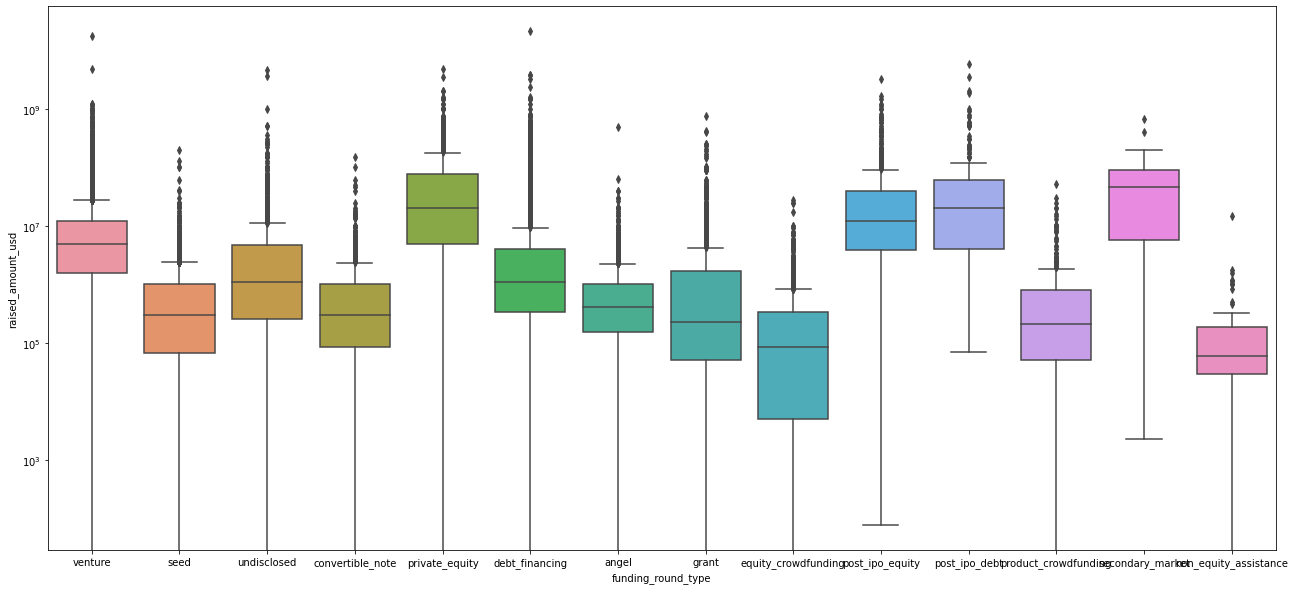

In [15]:
# boxplot of a variable across various funding categories
plt.figure(figsize=(22, 10))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.yscale('log')
plt.show()

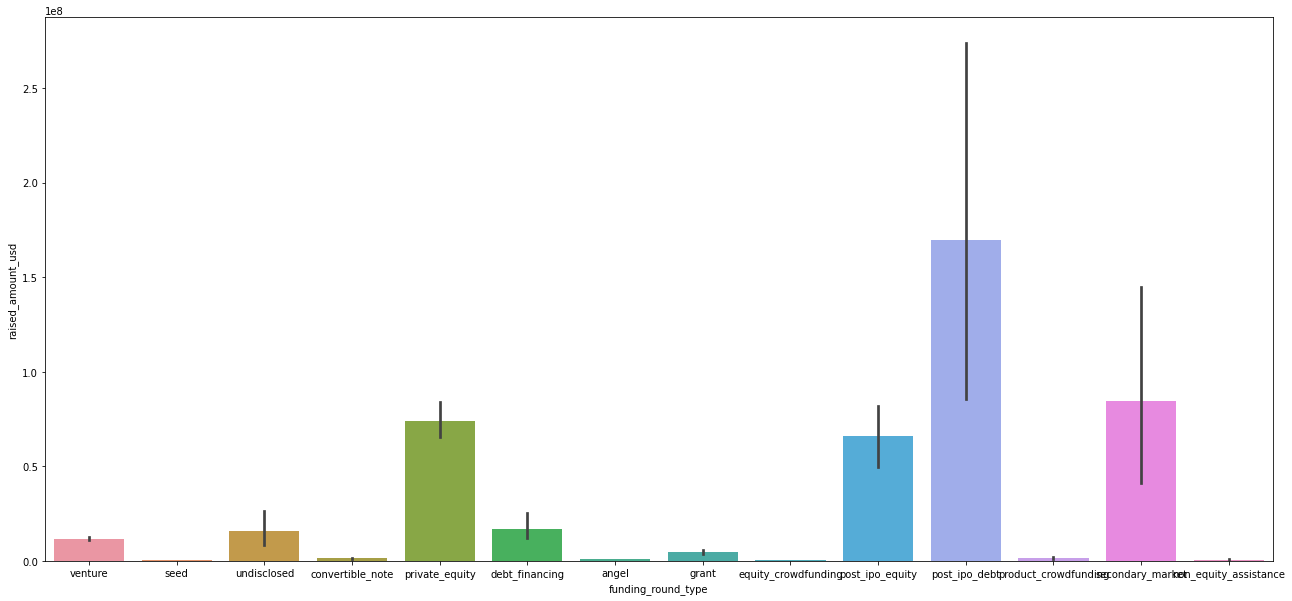

In [16]:
# bar plot with default statistic=mean
plt.figure(figsize=(22, 10))
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.show()

In [17]:
#since we are focused only on the main 4 types of investments, will be retaining only those
master_frame = master_frame[(master_frame['funding_round_type'] == 'venture') 
                            | (master_frame['funding_round_type'] == 'seed')
                            | (master_frame['funding_round_type'] == 'angel')
                            | (master_frame['funding_round_type'] == 'private_equity')]

In [18]:
round(master_frame.groupby('funding_round_type').raised_amount_usd.mean(), 2)

funding_round_type
angel               971573.89
private_equity    73938486.28
seed                747793.68
venture           11724222.69
Name: raised_amount_usd, dtype: float64

In [19]:
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
2,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
7,/organization/0ndine-biomedical-inc,seed,43360.0,Ondine Biomedical Inc.,Biotechnology,CAN
8,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN


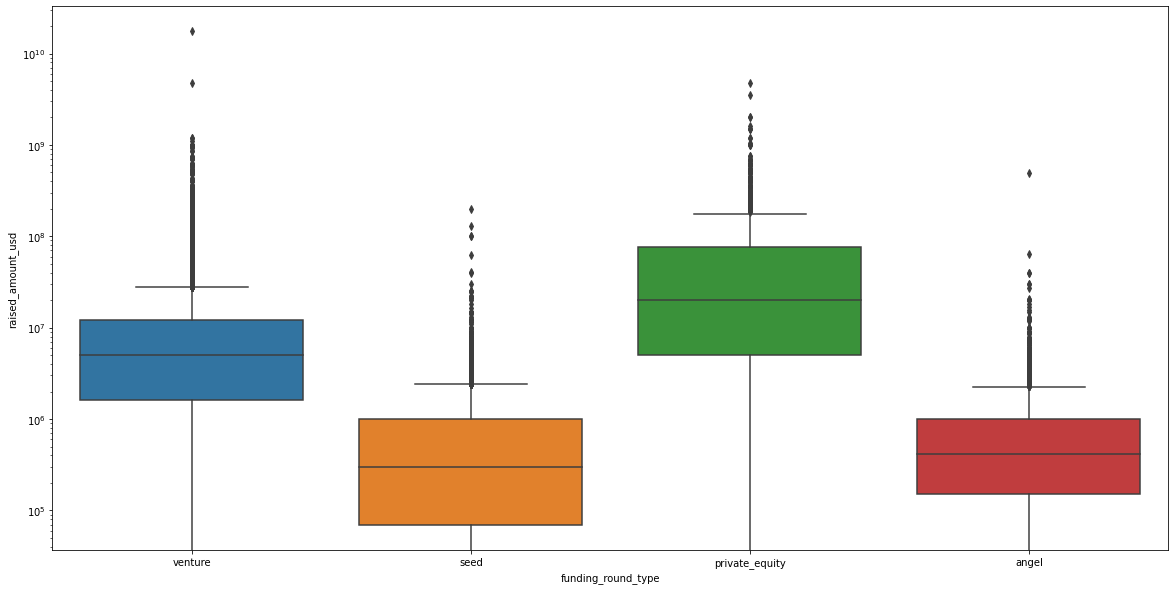

In [20]:
# box plot with most representative value as mean
plt.figure(figsize=(20, 10))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.yscale('log')

plt.show()

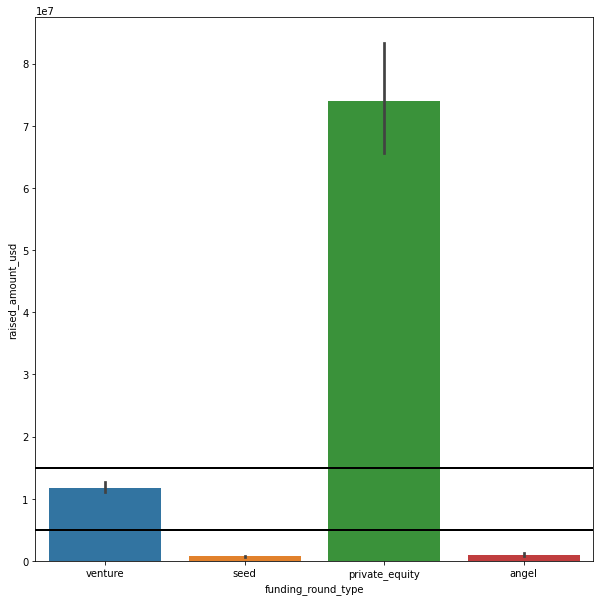

In [21]:
# bar plot with default statistic=mean
plt.figure(figsize=(10, 10))
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.axhline(y=5000000, linewidth=2, color = 'k')
plt.axhline(y=15000000, linewidth=2, color = 'k')
plt.show()

In [22]:
#as Sparks Funds wants to invest between 5 to 15 million, venture is the ideal investment type
master_frame = master_frame[master_frame['funding_round_type'] == 'venture'] 
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
8,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN
10,/organization/0xdata,venture,20000000.0,H2O.ai,Analytics,USA
11,/organization/0xdata,venture,1700000.0,H2O.ai,Analytics,USA


In [23]:
#dropping the column 'funding_round_type' as we have chosen venture for further analysis
master_frame = master_frame.drop(['funding_round_type'], axis = 1)
master_frame.head()

,company_permalink,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,10000000.0,#fame,Media,IND
4,/organization/0-6-com,2000000.0,0-6.com,Curated Web,CHN
8,/organization/0ndine-biomedical-inc,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN
10,/organization/0xdata,20000000.0,H2O.ai,Analytics,USA
11,/organization/0xdata,1700000.0,H2O.ai,Analytics,USA


**Checkpoint 3: Country Analysis**

In [24]:
#checking the top 9 countries which have received highest total funding
top9 = master_frame.groupby("country_code").raised_amount_usd.sum().reset_index()
top9 = top9.sort_values(by = 'raised_amount_usd', ascending = False)
top9 = top9.iloc[:9, ]
top9

,country_code,raised_amount_usd
94,USA,4.200680e+11
15,CHN,3.933892e+10
29,GBR,2.007281e+10
39,IND,1.426151e+10
12,CAN,9.482218e+09
28,FRA,7.226851e+09
42,ISR,6.854350e+09
21,DEU,6.306922e+09
45,JPN,3.167647e+09


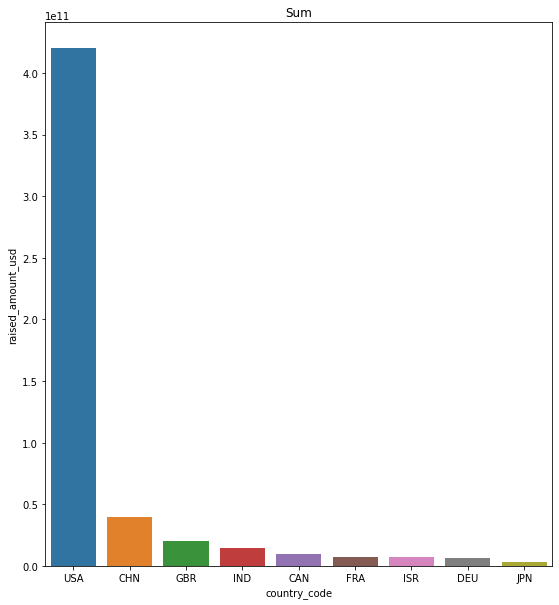

In [25]:
# Plotting sum across top 9 country_code 


plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 2)
sns.barplot(x="country_code", y="raised_amount_usd", data=top9, estimator=sum)
plt.title("Sum")
plt.show()

In [26]:
#The top 3 English speaking countries are USA, GBR, IND
master_frame = master_frame[(master_frame['country_code'] == 'USA')
                            | (master_frame['country_code'] == 'GBR')
                            | (master_frame['country_code'] == 'IND')]

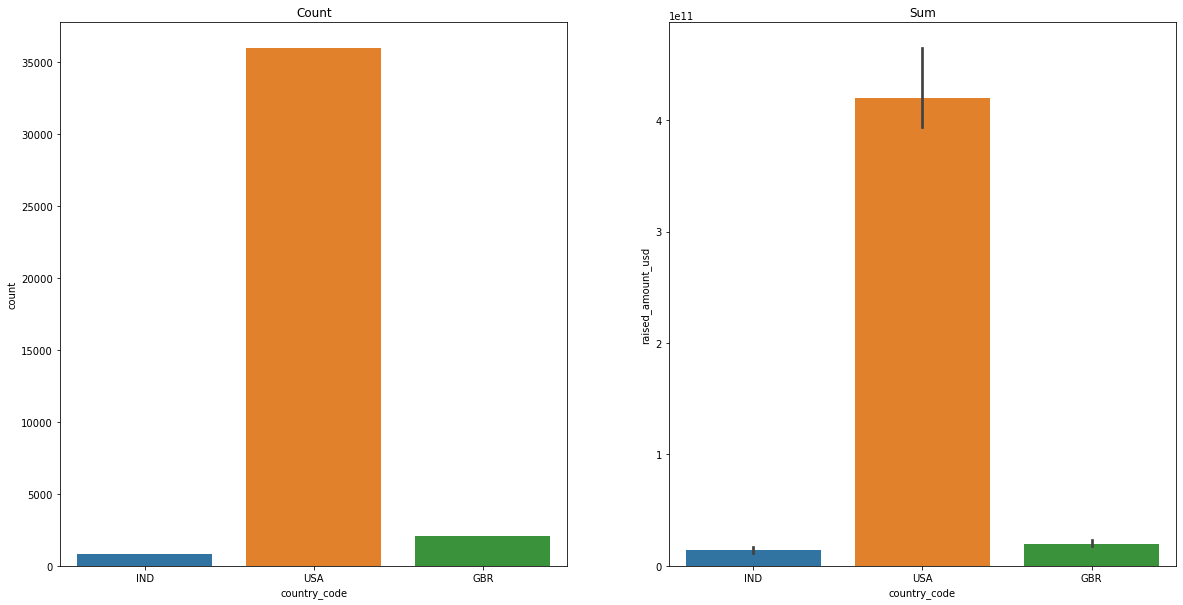

In [27]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(x="country_code", data=master_frame)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(x="country_code", y="raised_amount_usd", data=master_frame, estimator=sum)
plt.title("Sum")
plt.show()

**Checkpoint 4: Sector Analysis 1**

In [28]:
#extracting the primary vector value
master_frame['category_list'] = master_frame['category_list'].apply(lambda x: x.split('|')[0])

In [29]:
#reading the mapping file
mapping=pd.read_csv(r'C:\Users\Aravind\Downloads\mapping.csv', encoding= 'ANSI')
#mapping=pd.read_csv('mapping.csv')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [30]:
#in the mapping file there are certain improper values in category_list, hence replacing them, ex=Professio0l Networking
mapping.category_list = mapping.category_list.replace({'0':'na', '2.na' :'2.0'}, regex=True)
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [31]:
#reshaping the mapping dataframe to merge with master_frame DF, using melt() to unpivot
mapping = pd.melt(mapping, id_vars =['category_list'], value_vars =['Manufacturing','Automotive & Sports',
                                                              'Cleantech / Semiconductors','Entertainment',
                                                             'Health','News, Search and Messaging','Others',
                                                             'Social, Finance, Analytics, Advertising']) 
mapping = mapping[~(mapping.value == 0)]
mapping = mapping.drop('value', axis = 1)
mapping = mapping.rename(columns = {"variable":"main_sector"})
mapping.head()

,category_list,main_sector
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
7,Advanced Materials,Manufacturing
15,Agriculture,Manufacturing


In [32]:
#merging master frame with mapping frame
master_frame = master_frame.merge(mapping, how = 'left', on ='category_list')
master_frame.head()

,company_permalink,raised_amount_usd,name,category_list,country_code,main_sector
0,/organization/-fame,10000000.0,#fame,Media,IND,Entertainment
1,/organization/0xdata,20000000.0,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
2,/organization/0xdata,1700000.0,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
3,/organization/0xdata,8900000.0,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,5000000.0,1 Mainstream,Apps,USA,"News, Search and Messaging"


In [33]:
master_frame.category_list.describe()

count             38803
unique              563
top       Biotechnology
freq               5875
Name: category_list, dtype: object

In [34]:
#listing the sectors which have no main sectors in the Dateframe
print(master_frame[master_frame.main_sector.isnull()].category_list.unique())

['Nanotechnology' 'Natural Gas Uses' 'Natural Language Processing'
 'Enterprise 2.0' 'Adaptive Equipment' 'Racing' 'Specialty Retail'
 'Biotechnology and Semiconductor' 'Rapidly Expanding' 'Navigation'
 'Product Search' 'GreenTech' 'Retirement']


In [35]:
#checking the number of rows with NAN in main_sector value
len(master_frame[master_frame.main_sector.isnull()])

165

In [36]:
#retaining the rows which have main_sector values
master_frame = master_frame[~(master_frame.main_sector.isnull())]
len(master_frame.index)

38638

**Checkpoint 5: Sector Analysis 2**

In [37]:
#creating dataframe D1 for top english speaking country USA, and funding type FT falling within 5 to 15M USD
D1 = master_frame[(master_frame['country_code'] == 'USA') & 
             (master_frame['raised_amount_usd'] >= 5000000) & 
             (master_frame['raised_amount_usd'] <= 15000000)]
D1_gr = D1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
D1 = D1.merge(D1_gr, how='left', on ='main_sector')
D1.head()

,company_permalink,raised_amount_usd,name,category_list,country_code,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/0xdata,8900000.0,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising",2.380738e+10,2714
1,/organization/1-mainstream,5000000.0,1 Mainstream,Apps,USA,"News, Search and Messaging",1.395957e+10,1582
2,/organization/128-technology,11999347.0,128 Technology,Service Providers,USA,Others,2.632101e+10,2950
3,/organization/1366-technologies,15000000.0,1366 Technologies,Manufacturing,USA,Manufacturing,7.258553e+09,799
4,/organization/1366-technologies,5000000.0,1366 Technologies,Manufacturing,USA,Manufacturing,7.258553e+09,799


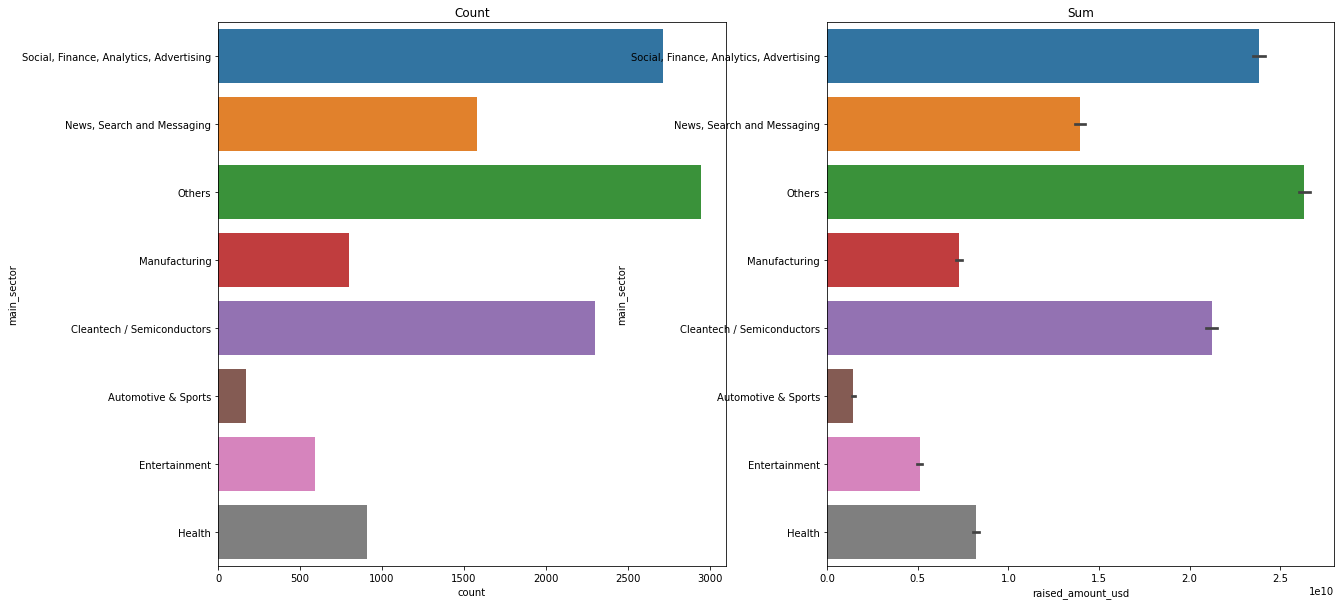

In [38]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(y="main_sector", data=D1)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(y="main_sector", x="raised_amount_usd", data=D1, estimator=sum)
plt.title("Sum")
plt.show()

In [39]:
#creating dataframe D2 for second english speaking country GBR, and funding type FT falling within 5 to 15M USD
D2 = master_frame[(master_frame['country_code'] == 'GBR') & 
             (master_frame['raised_amount_usd'] >= 5000000) & 
             (master_frame['raised_amount_usd'] <= 15000000)]
D2_gr = D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
D2 = D2.merge(D2_gr, how='left', on ='main_sector')
D2.head()

,company_permalink,raised_amount_usd,name,category_list,country_code,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/365scores,5500000.0,365Scores,Android,GBR,"Social, Finance, Analytics, Advertising",1.089404e+09,133
1,/organization/7digital,8468328.0,7digital,Content Creators,GBR,Entertainment,4.827847e+08,56
2,/organization/7digital,10000000.0,7digital,Content Creators,GBR,Entertainment,4.827847e+08,56
3,/organization/90min,15000000.0,90min,Media,GBR,Entertainment,4.827847e+08,56
4,/organization/90min,5800000.0,90min,Media,GBR,Entertainment,4.827847e+08,56


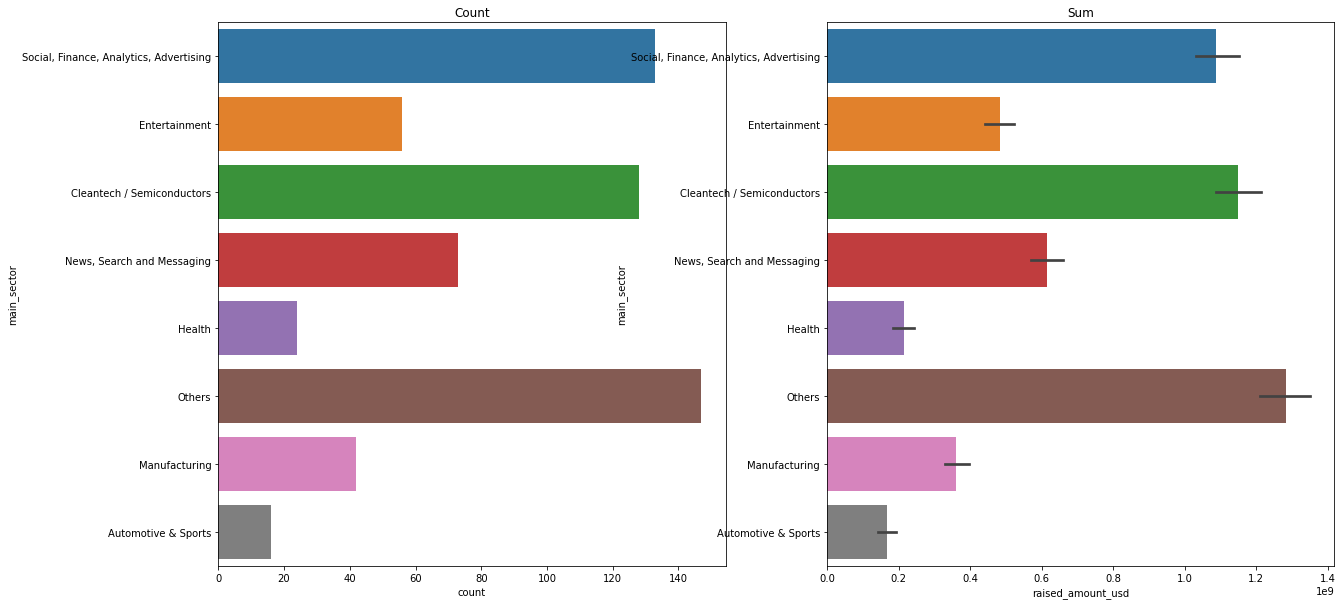

In [40]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(y="main_sector", data=D2)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(y="main_sector", x="raised_amount_usd", data=D2, estimator=sum)
plt.title("Sum")
plt.show()

In [41]:
#creating dataframe D3 for third english speaking country IND, and funding type FT falling within 5 to 15M USD
D3 = master_frame[(master_frame['country_code'] == 'IND') & 
             (master_frame['raised_amount_usd'] >= 5000000) & 
             (master_frame['raised_amount_usd'] <= 15000000)]
D3_gr = D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
D3 = D3.merge(D3_gr, how='left', on ='main_sector')
D3.head()

,company_permalink,raised_amount_usd,name,category_list,country_code,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/-fame,10000000.0,#fame,Media,IND,Entertainment,2.808300e+08,33
1,/organization/21diamonds-india,6369507.0,21Diamonds,E-Commerce,IND,Others,1.013410e+09,110
2,/organization/a-little-world,6410000.0,A LITTLE WORLD,Finance,IND,"Social, Finance, Analytics, Advertising",5.505496e+08,60
3,/organization/adlabs-imagica,8180000.0,Adlabs Imagica,Entertainment,IND,Entertainment,2.808300e+08,33
4,/organization/agile,5740000.0,Agile,Finance,IND,"Social, Finance, Analytics, Advertising",5.505496e+08,60


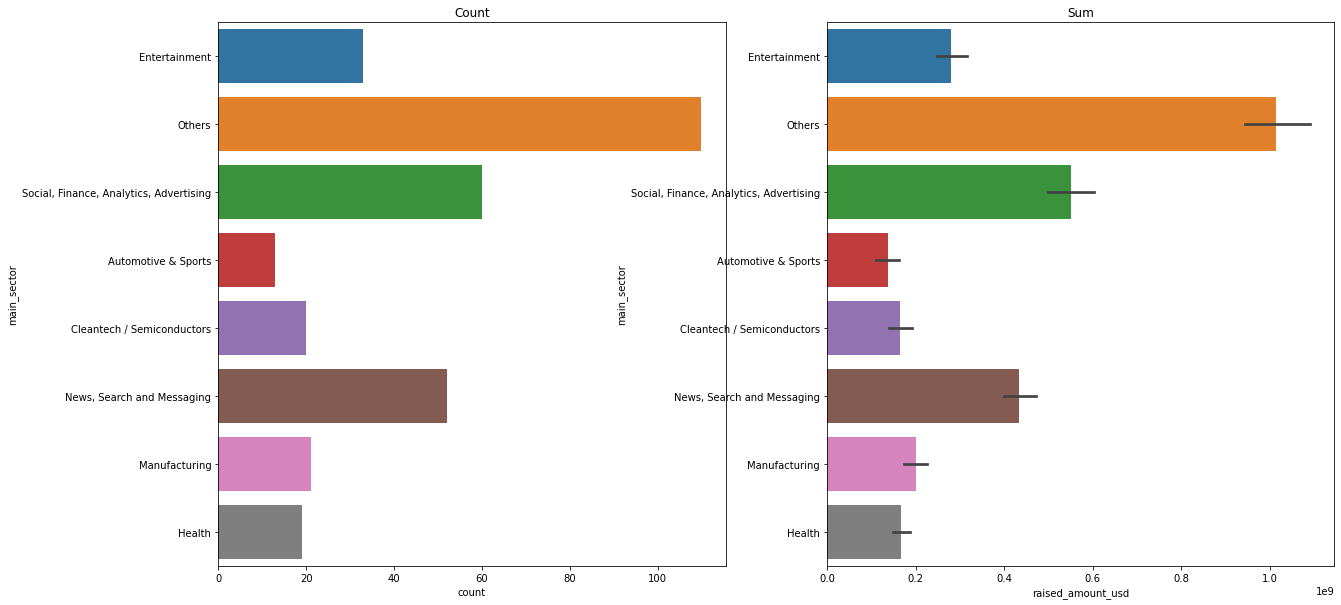

In [42]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(y="main_sector", data=D3)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(y="main_sector", x="raised_amount_usd", data=D3, estimator=sum)
plt.title("Sum")
plt.show()

In [43]:
#calculating total number of investments for all the three dataframes
print(D1.raised_amount_usd.count())
print(D2.raised_amount_usd.count())
print(D3.raised_amount_usd.count())

12012
619
328


In [44]:
#calculating the total amount of investment for all the three dataframes
print(round(D1.raised_amount_usd.sum(), 2))
print(round(D2.raised_amount_usd.sum(), 2))
print(round(D3.raised_amount_usd.sum(), 2))

107318294664.0
5365228300.0
2949543602.0


In [45]:
#Top sector, second-top, third-top for D1 (based on count of investments)
#Number of investments in the top, second-top, third-top sector in D1
D1_gr=D1_gr['raised_amount_usd'].sort_values('Total_count',ascending=False)
D1_gr

,Total_amount,Total_count
main_sector,,
Others,2.632101e+10,2950
"Social, Finance, Analytics, Advertising",2.380738e+10,2714
Cleantech / Semiconductors,2.120663e+10,2300
"News, Search and Messaging",1.395957e+10,1582
Health,8.211859e+09,909
Manufacturing,7.258553e+09,799
Entertainment,5.099198e+09,591
Automotive & Sports,1.454104e+09,167


In [46]:
#Top sector, second-top, third-top for D2 (based on count of investments)
#Number of investments in the top, second-top, third-top sector in D2
D2_gr=D2_gr['raised_amount_usd'].sort_values('Total_count',ascending=False)
D2_gr

,Total_amount,Total_count
main_sector,,
Others,1.283624e+09,147
"Social, Finance, Analytics, Advertising",1.089404e+09,133
Cleantech / Semiconductors,1.150140e+09,128
"News, Search and Messaging",6.157462e+08,73
Entertainment,4.827847e+08,56
Manufacturing,3.619403e+08,42
Health,2.145375e+08,24
Automotive & Sports,1.670516e+08,16


In [47]:
#Top sector, second-top, third-top for D2 (based on count of investments)
#Number of investments in the top, second-top, third-top sector in D3
D3_gr=D3_gr['raised_amount_usd'].sort_values('Total_count',ascending=False)
D3_gr

,Total_amount,Total_count
main_sector,,
Others,1.013410e+09,110
"Social, Finance, Analytics, Advertising",5.505496e+08,60
"News, Search and Messaging",4.338345e+08,52
Entertainment,2.808300e+08,33
Manufacturing,2.009000e+08,21
Cleantech / Semiconductors,1.653800e+08,20
Health,1.677400e+08,19
Automotive & Sports,1.369000e+08,13


In [48]:
#For the top sector USA , which company received the highest investment?
company = D1[D1['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

#For the second top sector USA , which company received the highest investment?
company = D1[D1['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                           raised_amount_usd
company_permalink                           
/organization/virtustream         64300000.0
                           raised_amount_usd
company_permalink                           
/organization/shotspotter         67933006.0


In [49]:
#For the top sector GBR , which company received the highest investment?
company = D2[D2['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

#For the second top sector GBR , which company received the highest investment?
company = D2[D2['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                              raised_amount_usd
company_permalink                              
/organization/electric-cloud         37000000.0
                                     raised_amount_usd
company_permalink                                     
/organization/celltick-technologies         37500000.0


In [50]:
#For the top sector IND , which company received the highest investment?
company = D3[D3['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

#For the second top sector IND , which company received the highest investment?
company = D3[D3['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                            raised_amount_usd
company_permalink                            
/organization/firstcry-com         39000000.0
                               raised_amount_usd
company_permalink                               
/organization/manthan-systems         50700000.0


**Checkpoints 6-Plots**

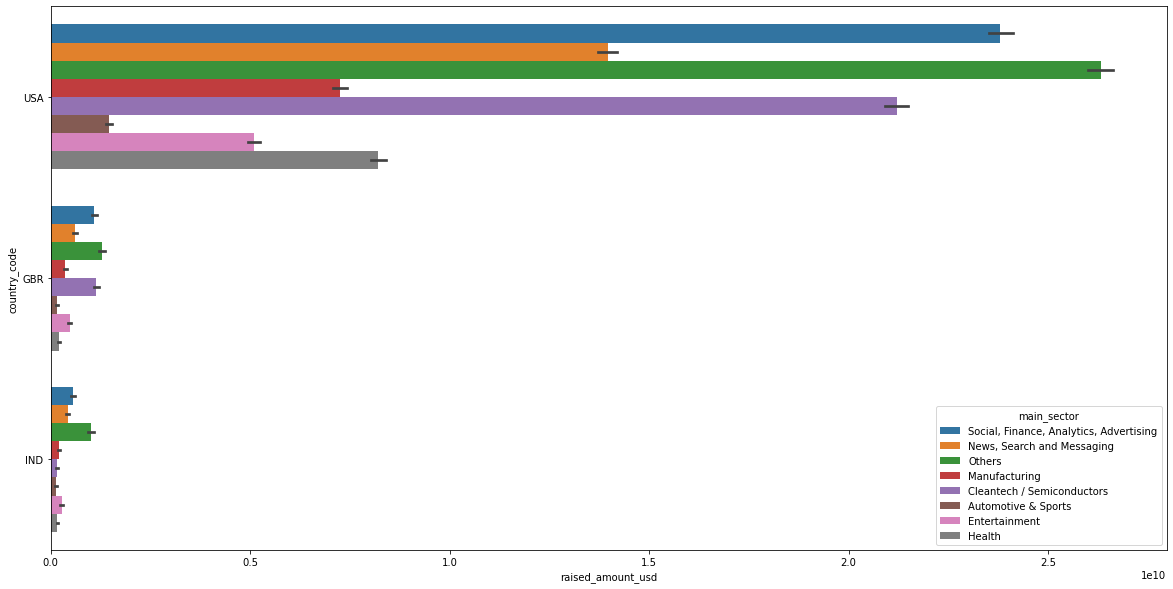

In [51]:
frames = [D1, D2, D3]
result = pd.concat(frames)
plt.figure(figsize=(20, 10))
sns.barplot(y='country_code', x='raised_amount_usd', hue="main_sector", data=result, estimator=np.sum)
plt.show()

,raised_amount_usd
country_code,
USA,4.200680e+11
CHN,3.933892e+10
GBR,2.007281e+10
IND,1.426151e+10
CAN,9.482218e+09
FRA,7.226851e+09
ISR,6.854350e+09
DEU,6.306922e+09
JPN,3.167647e+09


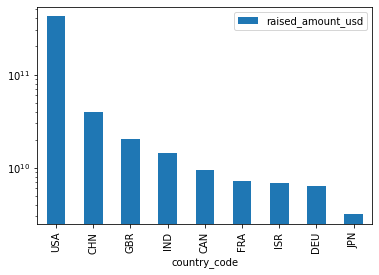

In [52]:
plotting = top9.set_index("country_code")
plotting.plot.bar(logy=True);
plotting